<a href="https://colab.research.google.com/github/Khyojae/2025.LLM/blob/main/cifar_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar100  #CIFAR-100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam


In [3]:
#CIFAR-100 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,100)
y_test=tf.keras.utils.to_categorical(y_test,100)

In [7]:
#신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(100,activation='softmax'))

In [8]:
#신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)


Epoch 1/30
391/391 - 144s - 369ms/step - accuracy: 0.0711 - loss: 4.0994 - val_accuracy: 0.1572 - val_loss: 3.5982
Epoch 2/30
391/391 - 145s - 372ms/step - accuracy: 0.1756 - loss: 3.4574 - val_accuracy: 0.2325 - val_loss: 3.1618
Epoch 3/30
391/391 - 200s - 511ms/step - accuracy: 0.2261 - loss: 3.1695 - val_accuracy: 0.2775 - val_loss: 2.9516
Epoch 4/30
391/391 - 206s - 527ms/step - accuracy: 0.2643 - loss: 2.9766 - val_accuracy: 0.3136 - val_loss: 2.7797
Epoch 5/30
391/391 - 142s - 363ms/step - accuracy: 0.2851 - loss: 2.8468 - val_accuracy: 0.3410 - val_loss: 2.6238
Epoch 6/30
391/391 - 142s - 364ms/step - accuracy: 0.3110 - loss: 2.7291 - val_accuracy: 0.3576 - val_loss: 2.5566
Epoch 7/30
391/391 - 203s - 520ms/step - accuracy: 0.3291 - loss: 2.6409 - val_accuracy: 0.3740 - val_loss: 2.4886
Epoch 8/30
391/391 - 143s - 365ms/step - accuracy: 0.3449 - loss: 2.5601 - val_accuracy: 0.3873 - val_loss: 2.4021
Epoch 9/30
391/391 - 142s - 362ms/step - accuracy: 0.3605 - loss: 2.4752 - val_a

In [10]:
#신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

정확률은 46.25999927520752


In [9]:
import matplotlib.pyplot as plt

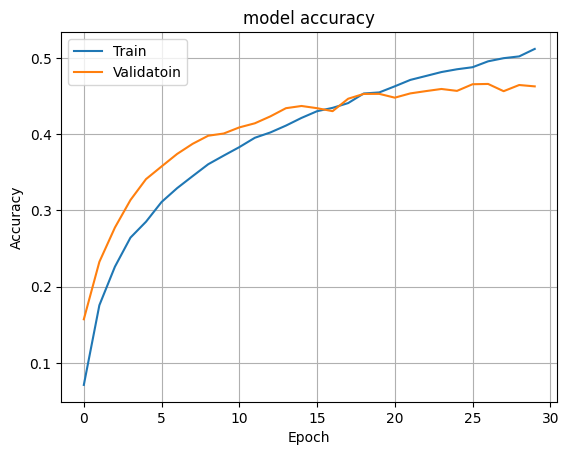

In [11]:
#정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validatoin'],loc='best')
plt.grid()
plt.show()

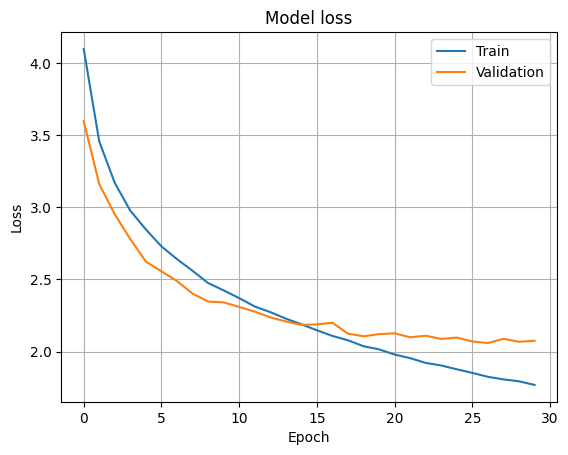

In [12]:
#손실함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
